In [27]:
from os import listdir
from os.path import isfile, join

import seaborn as sns
import matplotlib.pyplot as plt
from utils.rodents_routine import params_to_J_scalar, params_to_P_scalar, params_to_w_scalar

import pandas as pd

In [28]:
plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1.5)

In [29]:
path = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/results/backprop1000/method_validation"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [30]:
data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
        datum = {"J EE": params_to_J_scalar(J_array[0]), 
                 "J EI": params_to_J_scalar(J_array[1]), 
                 "J IE": params_to_J_scalar(J_array[2]),
                 "J II": params_to_J_scalar(J_array[3]),
                 "P EE": params_to_P_scalar(P_array[0]),
                 "P EI": params_to_P_scalar(P_array[1]),
                 "P IE": params_to_P_scalar(P_array[2]),
                 "P II": params_to_P_scalar(P_array[3]),
                 "w EE": params_to_w_scalar(w_array[0]),
                 "w EI": params_to_w_scalar(w_array[1]),
                 "w IE": params_to_w_scalar(w_array[2]),
                 "w II": params_to_w_scalar(w_array[3]),
                 "loss": loss}
        
        data.append(datum)

In [31]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

{'J EE': 1.373815342725755, 'J EI': 19.410816163887354, 'J IE': 30.95029664540487, 'J II': 69.83308288168556, 'P EE': 0.3360613540269341, 'P EI': 0.1649852931756178, 'P IE': 0.2806983915077369, 'P II': 0.8763378023456455, 'w EE': 66.82290051755315, 'w EI': 127.10325567818506, 'w IE': 87.89051642512608, 'w II': 103.63778598318932, 'loss': 0.011848032474517822}
{'J EE': 22.145385940552146, 'J EI': 17.441942196948595, 'J IE': 33.336404083158, 'J II': 50.09307489249287, 'P EE': 0.042735327414314926, 'P EI': 0.6197501791543482, 'P IE': 0.273438579106907, 'P II': 0.7815858558850465, 'w EE': 97.5330192610108, 'w EI': 25.673635514338034, 'w IE': 123.93961276763308, 'w II': 147.16482854805994, 'loss': 0.011210262775421143}
{'J EE': 26.108709689387357, 'J EI': 13.024571034448499, 'J IE': 89.03416849416533, 'J II': 56.28244654725481, 'P EE': 0.15863307899542883, 'P EI': 0.1252697654447726, 'P IE': 0.7907906760582505, 'P II': 0.5179055898198591, 'w EE': 69.60429303179025, 'w EI': 80.53410777196315

,J EE,J EI,J IE,J II,P EE,P EI,P IE,P II,w EE,w EI,w IE,w II,loss
0,1.373815,19.410816,30.950297,69.833083,0.336061,0.164985,0.280698,0.876338,66.822901,127.103256,87.890516,103.637786,0.011848
1,22.145386,17.441942,33.336404,50.093075,0.042735,0.619750,0.273439,0.781586,97.533019,25.673636,123.939613,147.164829,0.011210
2,26.108710,13.024571,89.034168,56.282447,0.158633,0.125270,0.790791,0.517906,69.604293,80.534108,151.954596,97.784981,0.395560
3,63.188918,32.791156,90.950789,78.893670,0.179503,0.193449,0.839046,0.731288,49.753356,146.585148,146.437436,92.204739,0.408536
4,42.078713,52.578311,80.521877,59.152905,0.382653,0.202117,0.771127,0.347246,51.707499,111.698095,114.685270,50.685083,0.407969


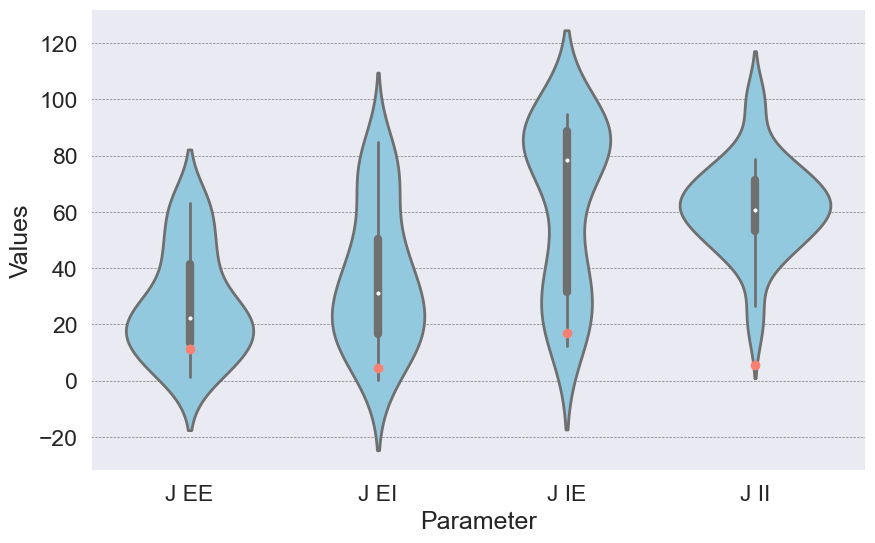

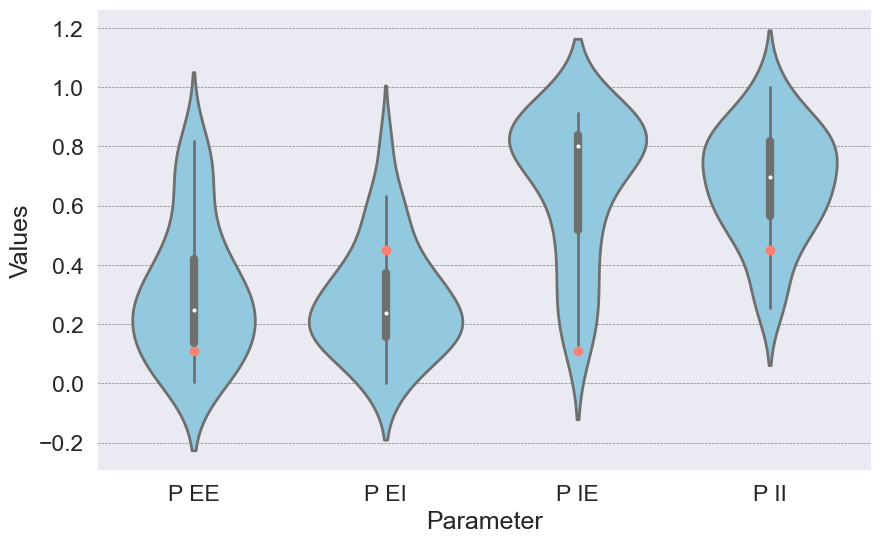

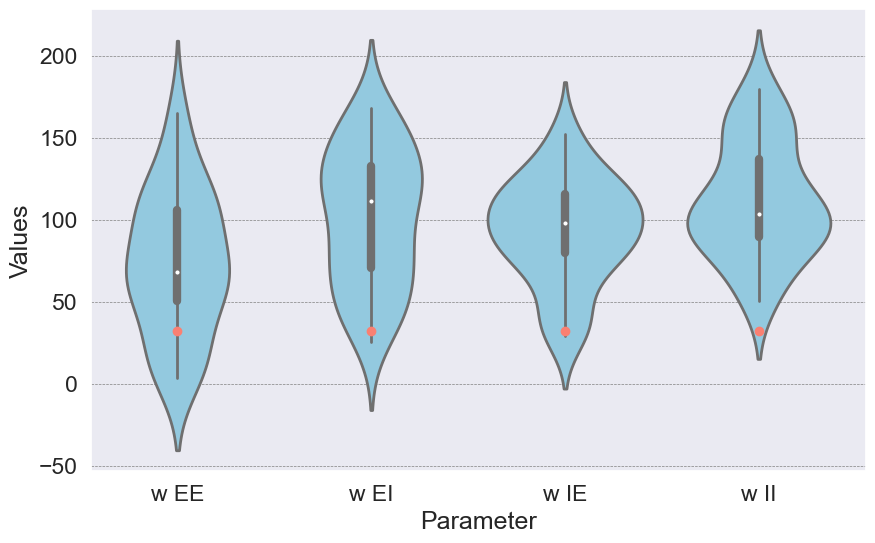

In [32]:
width = 0.8
linewidth=2

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["J EE", "J EI", "J IE", "J II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["P EE", "P EI", "P IE", "P II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["w EE", "w EI", "w IE", "w II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

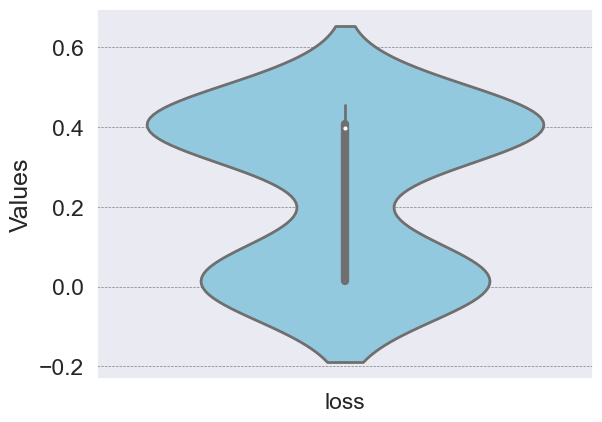

In [33]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

In [34]:
# remove the data with only low loss

data = []
for file in files:
    with open(f"{path}/{file}", 'r') as f:
        count = 0
        for line in f:
            if line[0] == '[':
                if count == 0:
                    J_array = eval(line.strip())
                    count += 1
                elif count == 1:
                    P_array = eval(line.strip())
                    count +=1
                else:
                    w_array = eval(line.strip())
                    count = 0
            if line[:5] == "loss:":
                loss = float(line.strip().split(' ')[-1])
        datum = {"J EE": params_to_J_scalar(J_array[0]), 
                 "J EI": params_to_J_scalar(J_array[1]), 
                 "J IE": params_to_J_scalar(J_array[2]),
                 "J II": params_to_J_scalar(J_array[3]),
                 "P EE": params_to_P_scalar(P_array[0]),
                 "P EI": params_to_P_scalar(P_array[1]),
                 "P IE": params_to_P_scalar(P_array[2]),
                 "P II": params_to_P_scalar(P_array[3]),
                 "w EE": params_to_w_scalar(w_array[0]),
                 "w EI": params_to_w_scalar(w_array[1]),
                 "w IE": params_to_w_scalar(w_array[2]),
                 "w II": params_to_w_scalar(w_array[3]),
                 "loss": loss}
        if loss < 0.02:
            data.append(datum)

In [35]:
df = pd.DataFrame(data)
for datum in data[:5]:
    print(datum)
df.head()

{'J EE': 1.373815342725755, 'J EI': 19.410816163887354, 'J IE': 30.95029664540487, 'J II': 69.83308288168556, 'P EE': 0.3360613540269341, 'P EI': 0.1649852931756178, 'P IE': 0.2806983915077369, 'P II': 0.8763378023456455, 'w EE': 66.82290051755315, 'w EI': 127.10325567818506, 'w IE': 87.89051642512608, 'w II': 103.63778598318932, 'loss': 0.011848032474517822}
{'J EE': 22.145385940552146, 'J EI': 17.441942196948595, 'J IE': 33.336404083158, 'J II': 50.09307489249287, 'P EE': 0.042735327414314926, 'P EI': 0.6197501791543482, 'P IE': 0.273438579106907, 'P II': 0.7815858558850465, 'w EE': 97.5330192610108, 'w EI': 25.673635514338034, 'w IE': 123.93961276763308, 'w II': 147.16482854805994, 'loss': 0.011210262775421143}
{'J EE': 3.6483096071848893, 'J EI': 13.91351213202664, 'J IE': 12.39710573556574, 'J II': 62.61873801024566, 'P EE': 0.24639953422344296, 'P EI': 0.38306475949575625, 'P IE': 0.7339209733978701, 'P II': 0.6952061979213039, 'w EE': 67.07380009576353, 'w EI': 113.3565334776579

,J EE,J EI,J IE,J II,P EE,P EI,P IE,P II,w EE,w EI,w IE,w II,loss
0,1.373815,19.410816,30.950297,69.833083,0.336061,0.164985,0.280698,0.876338,66.822901,127.103256,87.890516,103.637786,0.011848
1,22.145386,17.441942,33.336404,50.093075,0.042735,0.619750,0.273439,0.781586,97.533019,25.673636,123.939613,147.164829,0.011210
2,3.648310,13.913512,12.397106,62.618738,0.246400,0.383065,0.733921,0.695206,67.073800,113.356533,86.096046,127.371678,0.013045
3,18.731711,73.771077,22.016845,60.616018,0.086623,0.257563,0.608591,0.654063,75.186758,118.718818,36.266426,103.911349,0.016935
4,19.181913,44.943173,54.941021,60.243276,0.234713,0.222038,0.236564,0.793448,13.557224,77.204934,36.888359,94.634587,0.014517


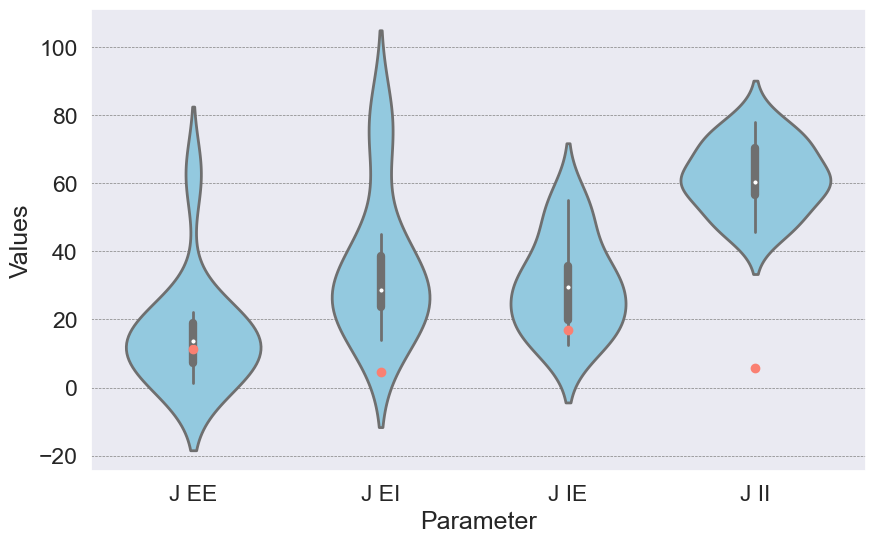

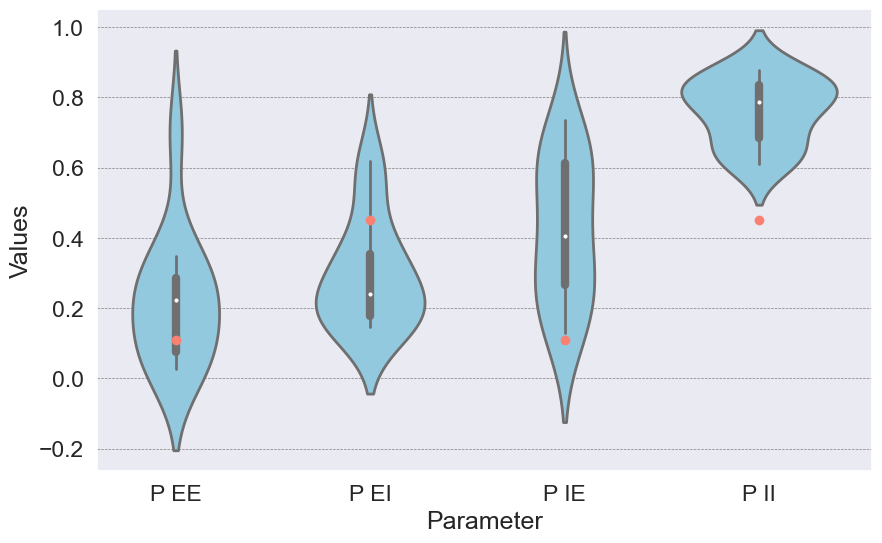

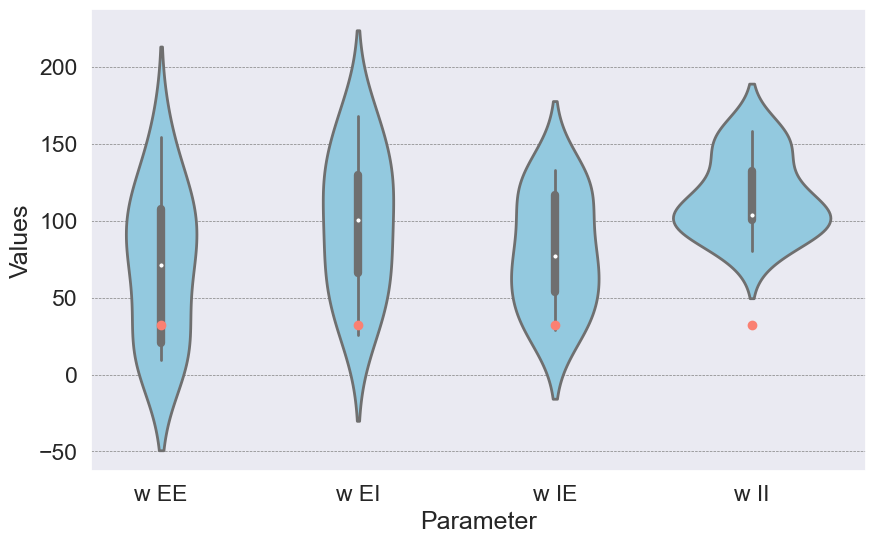

In [36]:
width = 0.8
linewidth=2

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["J EE", "J EI", "J IE", "J II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [11.31, 4.52, 16.97, 5.66]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["P EE", "P EI", "P IE", "P II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [0.11, 0.45, 0.11, 0.45]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[["w EE", "w EI", "w IE", "w II"]], color='skyblue', width=width, linewidth=linewidth)  # Use inner="points" to show the individual data points
ground_truths = [32, 32, 32, 32]
for i, ground_truth in enumerate(ground_truths):
    ax.plot(i, ground_truth, marker='.', color='salmon', markersize=10, markeredgewidth=2)  # Plot median as a red cross ('x')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Parameter')
plt.ylabel('Values')
plt.show()

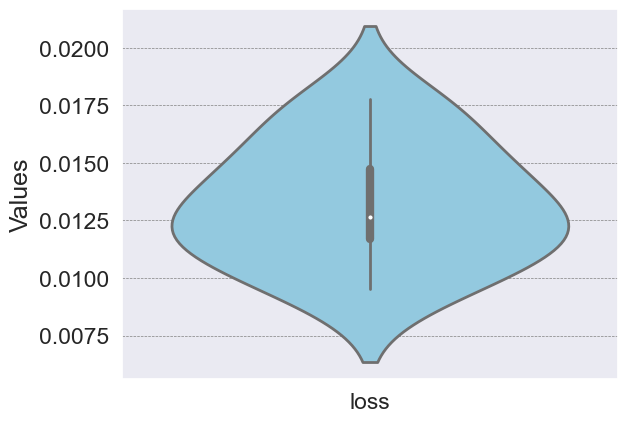

In [37]:
ax = sns.violinplot(data=df[["loss"]], color='skyblue', linewidth=linewidth)  # Use inner="points" to show the individual data points
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('')
plt.ylabel('Values')
plt.show()